## **Importación de librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns


# **1. Extracción**📌

## &nbsp;&nbsp;&nbsp;1.1. **Extracción de datos**

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.1. **Cargando los datos de la API**

In [2]:
path = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(path)

In [3]:
df.sample(10)

,customerID,Churn,customer,phone,internet,account
3224,4501-VCPFK,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5846,7996-BPXHY,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
5185,7077-XJMET,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7136,9821-POOTN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5455,7472-EQOAV,No,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
2996,4159-NAAIX,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
3986,5447-WZAFP,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
5297,7240-ETPTR,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1474,2114-MGINA,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1188,1697-NVVGY,No,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


* ### El DataFrame posee 6 columnas de las cuales 2 estan planas y 4 estan por normlaizar

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


* ### Normalizando columnas

In [5]:
#Normalizamos las columnas de uno en uno
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

In [6]:
#Creamos un data frame con las columnas planas
columnas_planas = df.drop(columns=['customer','phone','internet','account'])

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.1.2. **Convirtiendo los datos en un DataFrame**

In [7]:
# Unimos todos los datos en un solo dataframe consolidado llamado "Datos"
datos = pd.concat([columnas_planas, customer_df, phone_df, internet_df, account_df], axis=1)

In [8]:
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
2190,3067-SVMTC,No,Female,0,Yes,No,68,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Bank transfer (automatic),55.90,3848.8
986,1389-CXMLU,Yes,Male,1,No,No,3,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,91.05,289.1
5700,7787-BNTZM,No,Male,0,No,No,6,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.15,130.5
1571,2237-ZFSMY,Yes,Female,0,No,No,39,Yes,No,Fiber optic,...,No,Yes,Yes,Yes,No,One year,Yes,Electronic check,95.55,3692.85
5411,7399-QHBJS,No,Female,0,Yes,Yes,72,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,No,Credit card (automatic),66.75,4760.3
4386,6008-NAIXK,No,Male,1,No,No,54,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,55.45,2966.95
919,1301-LOPVR,No,Male,0,Yes,Yes,29,No,No phone service,DSL,...,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),55.35,1636.95
2385,3327-YBAKM,No,Female,0,Yes,No,64,Yes,No,Fiber optic,...,No,No,Yes,Yes,Yes,One year,Yes,Mailed check,96.90,6314.35
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
4605,6313-GIDIT,Yes,Male,1,No,No,53,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,2854.55


# **2. Transformación**🔧

## &nbsp;&nbsp;&nbsp;2.1. **Conociendo el conjunto de datos**

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1.1. **Explorando las columnas del dataset y tipos de datos**

In [9]:
# Verificando las columnas y tipos de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# Verificando el tipo de dato de cada columna
datos.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2. **Identificar las columnas más relevantes para el análisis**

* variable objetivo o target en este caso sería la columna "**churn**" ya que indica si el cliente abandonó el servicio.

* Variables categóricas

    * **CustomerID**: es el código de identificación del cliente
    * **gender**: género masculino o femenino
    * **Partner**: indica si el cliente tiene o no tiene pareja (si / no)
    * **Dependents**: si el cliente tiene dependientes (si / no)
    * **PhoneService**: si esta o no esta suscrito al servicio telefonico (si / no)
    * **MultipleLines**: si esta suscrito a más de una linea telefónia (si / no)
    * **InternetService**: si esta o no esta a un proveedor de internet (si / no)
    * **OnlineSecurity**: suscripcion al servicio de seguridad en linea (si / no)
    * **OnlieBackup**: suscripción a un almacenamiento en linea (si / no)
    * **DeviceProtection**: Servicio de protección en linea (si / no)
    * **TechSupport**: servicio de soporte tecnico (si / no)
    * **StreamingTV**: Suscripción a televisión por cable (si / no)
    * **StreamingMovies**: Suscripción a peliculas de streaming (si / no)
    * **Contract**: indica el tiempo de contrato
    * **PaperlessBilling**: facturación en linea (si / no)
    * **PaymentMethod**: indica el metodo de pago del cliente

* Variable numericas

    * **tenure**: número de meses de contrato del cliente
    * **Charges.Monthly**: número total de servicios del cliente por mes
    * **Charges.Total**: gasto total del cliente

## &nbsp;&nbsp;&nbsp;2.2. **Comprobación de incoherencias en los datos**

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.1. **Verificación de posibles problemas en los datos**

In [11]:
# Verificando si las columnas presentan valores nulos
datos.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [12]:
# Verificando si los datos presentan valores duplicados

datos.duplicated().sum()

0

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2. **Manejo de inconsistencias**

In [13]:
# Eliminando filas en las que lacolumna 'Charges.Total' contega valores nulos

datos = datos.dropna(subset=['Charges.Total'])
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [14]:
datos['Charges.Total'].sample(10)

2988     220.95
6189      318.5
6405     564.35
4180    1500.25
234      2911.3
5141      43.15
649       19.55
526     2898.95
5309    3969.35
4953    5744.35
Name: Charges.Total, dtype: object

In [15]:
# Reemplazando posibles caracteres no numericos para preparar la columna 'Caharges.total' para su conversión

datos['Charges.Total'] = datos['Charges.Total'].str.replace(' ','').replace('$', '').replace(',', '').replace('', None)

In [16]:
datos['Charges.Total'].dtype

dtype('O')

In [17]:
# Cambiando tipo de dato de 'Charges.Total' de objet a float64

datos['Charges.Total'] = datos['Charges.Total'].astype(float)

In [18]:
datos['Charges.Total'].dtype

dtype('float64')

In [19]:
# Verificamos si la columna 'churn' tiene campos vacíos, realizando un conteo de valores únicos

datos['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Se evidencia que hay 224 filas con valores en blanco

In [20]:
# Verificando filas con valores de 'churn' en blanco

datos[datos['Churn'].isin(['', None])]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [21]:
# Creando un nuevo DataFrame para excluir los valores nulos de la columna 'churn'

datos_analisis = datos[datos['Churn'] != '']



In [22]:
datos_analisis['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [23]:
datos_analisis

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Verificamos si existen otras columnas de tipo Yes/No con espacios en blanco 


In [24]:
columnas_binarias = [
    'Churn', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PhoneService', 'MultipleLines'
]

In [25]:
datos_analisis[columnas_binarias].isna().sum()

Churn               0
Partner             0
Dependents          0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
PhoneService        0
MultipleLines       0
dtype: int64

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.3. **Columna de cuentas diarias**

Ahora que los datos están limpios, es momento de crear la columna "`Charges.Daily`". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [26]:
# Asignamos a los datos la columna 'charges.Dayli'

datos_analisis['Charges.Daily'] = datos_analisis['Charges.Monthly'] / 30

C:\Users\magno\AppData\Local\Temp\ipykernel_25548\1408734853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_analisis['Charges.Daily'] = datos_analisis['Charges.Monthly'] / 30


In [27]:
# Verificamos la la columna se ha creado correctamente

datos_analisis['Charges.Daily'].sample(10)

4627    2.705000
5096    3.396667
6123    2.830000
3973    3.613333
2926    3.153333
5643    2.063333
6891    2.668333
4181    3.481667
519     1.855000
2132    3.028333
Name: Charges.Daily, dtype: float64

In [28]:
datos_analisis['Charges.Daily'].dtypes

dtype('float64')

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.4. **Estandarización y transformación de datos**

In [29]:
# De la lista de columnas binarias. convertimos los valores Yes / No en 1 / 0 respectivamente

datos_analisis[columnas_binarias] = datos_analisis[columnas_binarias].replace({'Yes': 1, 'No': 0})

C:\Users\magno\AppData\Local\Temp\ipykernel_25548\437624103.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_analisis[columnas_binarias] = datos_analisis[columnas_binarias].replace({'Yes': 1, 'No': 0})
C:\Users\magno\AppData\Local\Temp\ipykernel_25548\437624103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_analisis[columnas_binarias] = datos_analisis[columnas_binarias].replace({'Yes': 1, 'No': 0})


In [30]:
# Verificamos la trasformación de los datos:

datos_analisis

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


Traducimos el nombre de las columnas para obtner una mejor comprención de los campos:

In [31]:
# Verificamos el nombre de todas las columnas

columns = [datos_analisis.columns]
columns

[Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
        'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
        'Charges.Daily'],
       dtype='object')]

In [32]:
# Creamos un diccionario con la traducción de estos nombres de columnas:

diccionario_traduccion = {
    'customerID': 'Id_Cliente',
    'Churn': 'Abandono',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Con_Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad',
    'InternetService': 'Internet_Tipo',
    'OnlineSecurity': 'Seguridad_Linea',
    'OnlineBackup': 'Respaldo_Linea',
    'DeviceProtection': 'Proteccion_Equipo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Tv_Streaming',
    'StreamingMovies': 'Peliculas_Streaming',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Factura_Digital',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargo_Mensual',
    'Charges.Total': 'Cargo_Total',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Lineas_Multiples',
    'Charges.Daily': 'Cargo_Diario'
}


In [33]:
# Renombramos el nombre de las columnas a los datos a partir del diccionario creado

datos_analisis = datos_analisis.rename(columns=diccionario_traduccion)

In [34]:
datos_analisis.dtypes

Id_Cliente              object
Abandono                 int64
Genero                  object
Adulto_Mayor             int64
Con_Pareja               int64
Dependientes             int64
Antiguedad               int64
Servicio_Telefonico      int64
Lineas_Multiples        object
Internet_Tipo           object
Seguridad_Linea         object
Respaldo_Linea          object
Proteccion_Equipo       object
Soporte_Tecnico         object
Tv_Streaming            object
Peliculas_Streaming     object
Tipo_Contrato           object
Factura_Digital          int64
Metodo_Pago             object
Cargo_Mensual          float64
Cargo_Total            float64
Cargo_Diario           float64
dtype: object

# **3. Carga y análisis**


## &nbsp;&nbsp;&nbsp;3.1. **Analisis Descriptivo**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [35]:
# Separamos las variables numéricas

columnas_numericas = datos_analisis.select_dtypes(include=['int64', 'float64']).columns.to_list()
columnas_numericas

['Abandono',
 'Adulto_Mayor',
 'Con_Pareja',
 'Dependientes',
 'Antiguedad',
 'Servicio_Telefonico',
 'Factura_Digital',
 'Cargo_Mensual',
 'Cargo_Total',
 'Cargo_Diario']

In [36]:
# Separamos las variables categóricas

columnas_categoricas = datos_analisis.select_dtypes(include='object').columns.to_list()
columnas_categoricas

['Id_Cliente',
 'Genero',
 'Lineas_Multiples',
 'Internet_Tipo',
 'Seguridad_Linea',
 'Respaldo_Linea',
 'Proteccion_Equipo',
 'Soporte_Tecnico',
 'Tv_Streaming',
 'Peliculas_Streaming',
 'Tipo_Contrato',
 'Metodo_Pago']

In [37]:
# Analisi descriptivo para información estadistica básica de columnas numéricas

datos_analisis[columnas_numericas].describe()

,Abandono,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Factura_Digital,Cargo_Mensual,Cargo_Total,Cargo_Diario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [38]:
datos_analisis.groupby('Abandono')[columnas_numericas].agg(['mean','std','min','max'])

Abandono              Adulto_Mayor                   Con_Pareja  \
             mean  std min max         mean       std min max       mean   
Abandono                                                                   
0             0.0  0.0   0   0     0.128721  0.334923   0   1   0.528218   
1             1.0  0.0   1   1     0.254682  0.435799   0   1   0.357945   

                    ... Cargo_Mensual          Cargo_Total               \
               std  ...           min     max         mean          std   
Abandono            ...                                                   
0         0.499251  ...         18.25  118.75  2555.344141  2329.456984   
1         0.479524  ...         18.85  118.35  1531.796094  1890.822994   

                         Cargo_Diario                                
            min      max         mean       std       min       max  
Abandono                                                             
0         18.80  8672.45     2.042171  1.036422  0.608333  3.958333  
1         18.85  8684.80     2.481378  0.822202  0.628333  3.945000  

[2 rows x 40 columns]

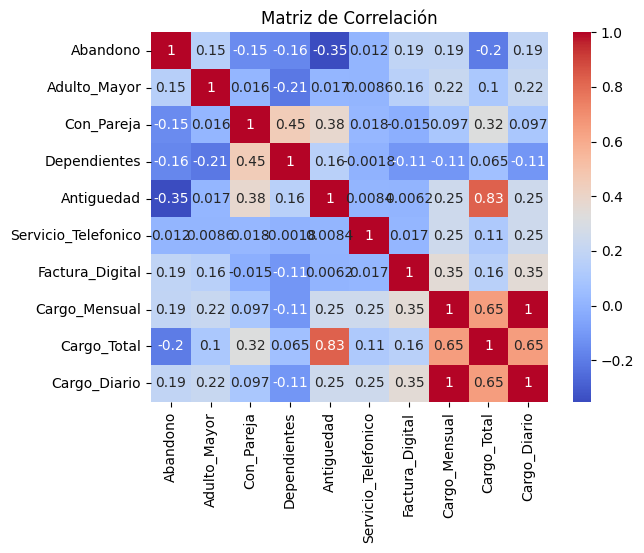

In [39]:
# Mapa de calor de correlación

sns.heatmap(datos_analisis[columnas_numericas].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## &nbsp;&nbsp;&nbsp;3.2. **Distribución de evación**

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

C:\Users\magno\AppData\Local\Temp\ipykernel_25548\2416730362.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=proporcion.index, y=proporcion.values, ax=ax, palette='tab10')


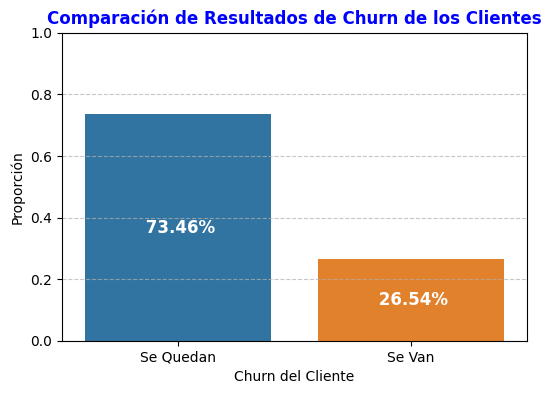

In [40]:
# Calculando proporciones
proporcion = datos_analisis['Abandono'].value_counts(normalize=True)

# Asignando nombres a cada categoría:
proporcion.index = ['Se Quedan', 'Se Van']

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=proporcion.index, y=proporcion.values, ax=ax, palette='tab10')

for i, val in enumerate(proporcion.values):
    ax.text(i, val / 2, f'{val: .2%}', ha='center', va='center', color='white', fontweight='bold', fontsize=12)

# Personalizando el gráfico
ax.set_ylabel('Proporción')
ax.set_xlabel('Churn del Cliente')
ax.set_title('Comparación de Resultados de Churn de los Clientes', fontsize=12, fontweight='bold', color='blue')
ax.set_ylim(0,1)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## &nbsp;&nbsp;&nbsp;3.3. **Recuento de evasión por variables categóricas**

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [41]:
# Utilizamos la lista de columnas categórcas que creamos anteriormente:

columnas_categoricas.remove('Id_Cliente')
columnas_categoricas

['Genero',
 'Lineas_Multiples',
 'Internet_Tipo',
 'Seguridad_Linea',
 'Respaldo_Linea',
 'Proteccion_Equipo',
 'Soporte_Tecnico',
 'Tv_Streaming',
 'Peliculas_Streaming',
 'Tipo_Contrato',
 'Metodo_Pago']

In [42]:
datos_analisis[columnas_categoricas].head()

,Genero,Lineas_Multiples,Internet_Tipo,Seguridad_Linea,Respaldo_Linea,Proteccion_Equipo,Soporte_Tecnico,Tv_Streaming,Peliculas_Streaming,Tipo_Contrato,Metodo_Pago
0,Female,0,DSL,0,1,0,1,1,0,One year,Mailed check
1,Male,1,DSL,0,0,0,0,0,1,Month-to-month,Mailed check
2,Male,0,Fiber optic,0,0,1,0,0,0,Month-to-month,Electronic check
3,Male,0,Fiber optic,0,1,1,0,1,1,Month-to-month,Electronic check
4,Female,0,Fiber optic,0,0,0,1,1,0,Month-to-month,Mailed check


In [43]:
# Creamos una función para graficar la distribución de abandono por variable categórica

def graficar_por_variable(df, columnas):
    plt.figure(figsize=(7,5))
    ax = sns.countplot(
        data=df,
        x=columnas,
        hue='Abandono',
        palette='tab10'
    )
    
    # Añadiendo el valor de cada gráfico:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, fontweight='bold')
    
    # Etiquetas
    total = len(df)
    ax.set_title(f'Abandono Segun {columnas}', fontsize=14, fontweight='bold')
    ax.set_xlabel(columnas, fontsize=12)
    ax.set_ylabel('Cantidad de Clientes')
    ax.legend(title='Abandono',labels=['No', 'Sí'])
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()
    


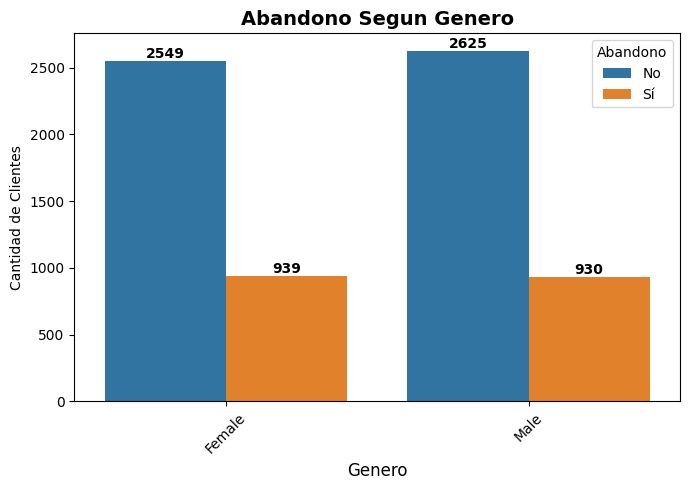

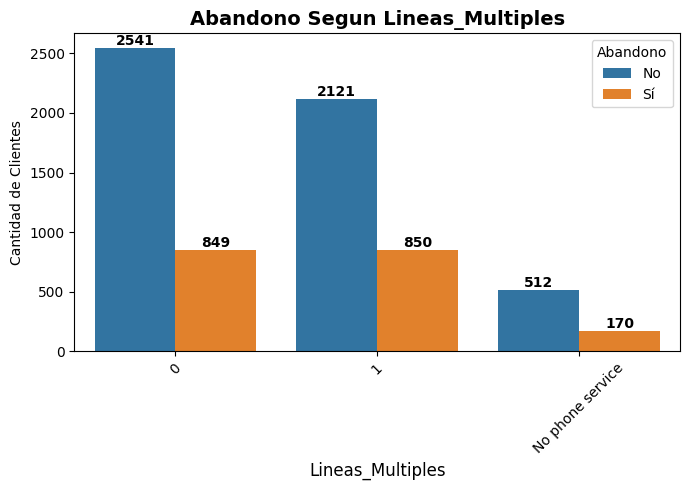

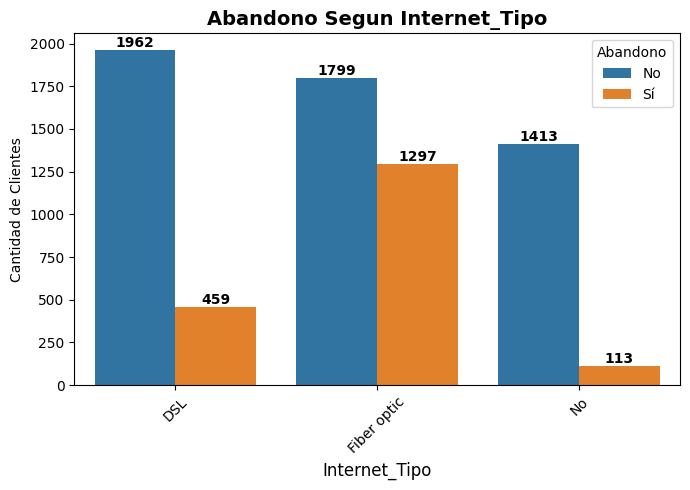

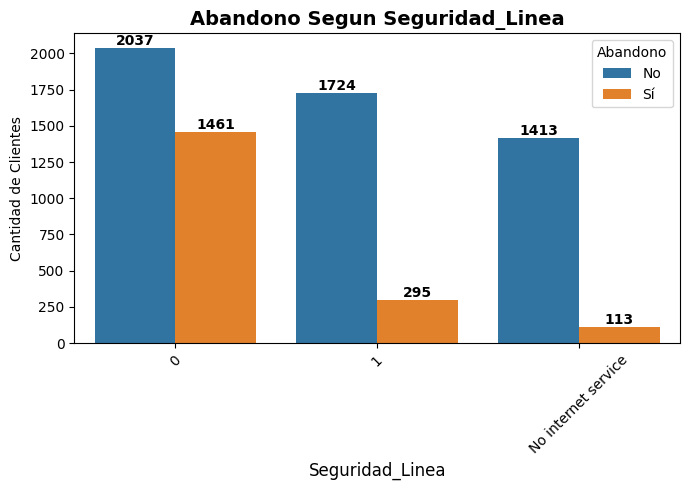

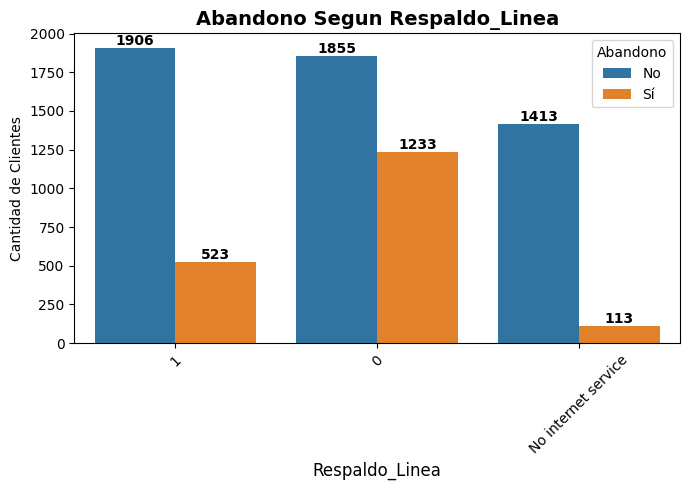

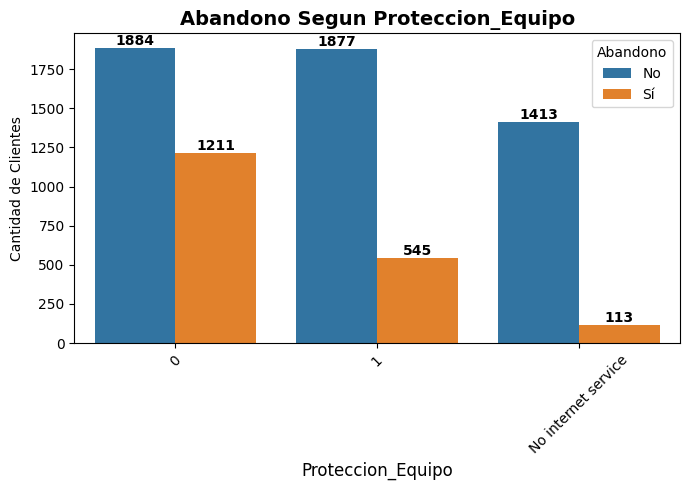

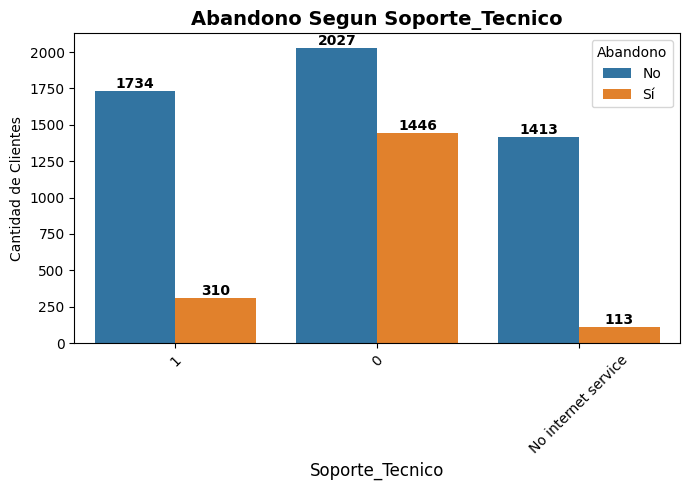

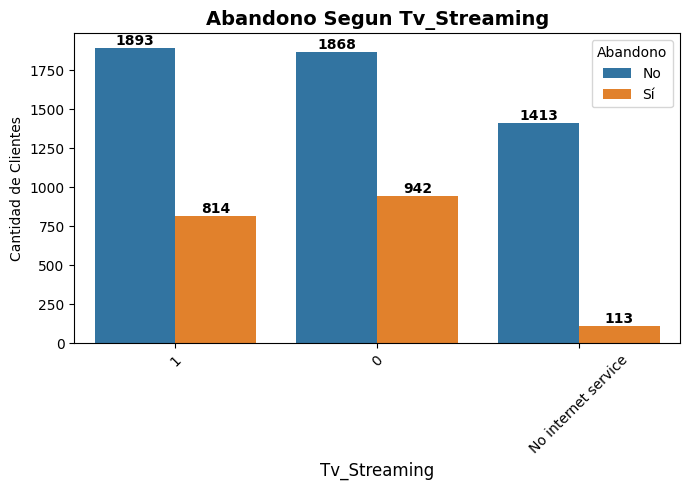

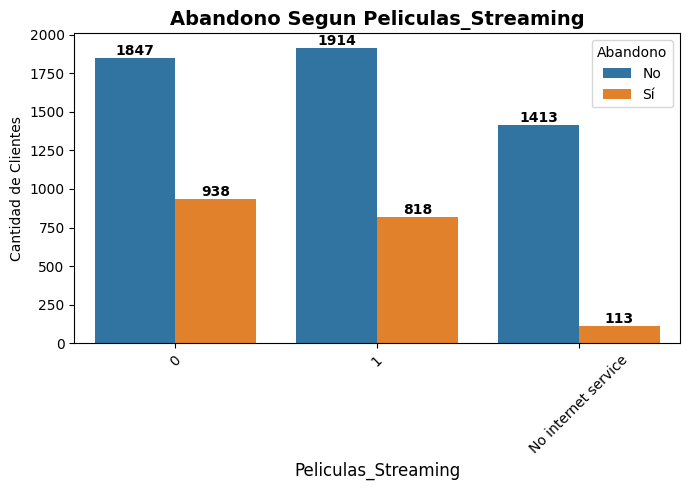

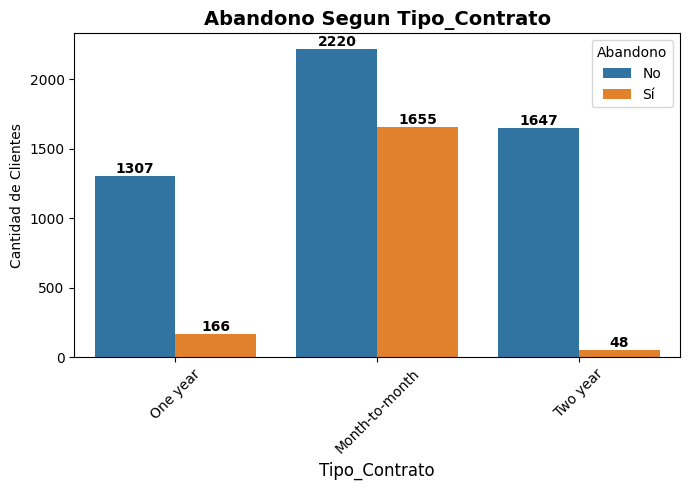

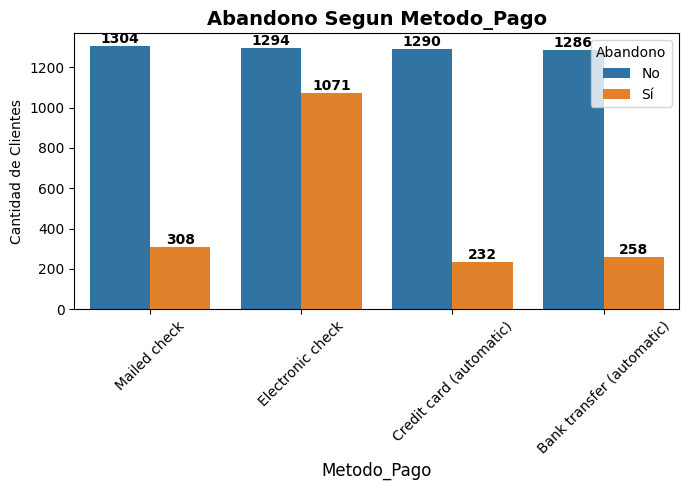

In [44]:
for var in columnas_categoricas:
    graficar_por_variable(datos_analisis, var)

In [45]:
#Preparando los datos para el analisis de estadistica descriptiva:
for var in columnas_categoricas:
    print(f"\n{var} - Valores únicos:")
    print(datos_analisis[var].unique())



Genero - Valores únicos:
['Female' 'Male']

Lineas_Multiples - Valores únicos:
[0 1 'No phone service']

Internet_Tipo - Valores únicos:
['DSL' 'Fiber optic' 'No']

Seguridad_Linea - Valores únicos:
[0 1 'No internet service']

Respaldo_Linea - Valores únicos:
[1 0 'No internet service']

Proteccion_Equipo - Valores únicos:
[0 1 'No internet service']

Soporte_Tecnico - Valores únicos:
[1 0 'No internet service']

Tv_Streaming - Valores únicos:
[1 0 'No internet service']

Peliculas_Streaming - Valores únicos:
[0 1 'No internet service']

Tipo_Contrato - Valores únicos:
['One year' 'Month-to-month' 'Two year']

Metodo_Pago - Valores únicos:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [46]:
# Columnas que deben tener solo 0 y 1
columnas_binarias = [
    'Lineas_Multiples',
    'Seguridad_Linea',
    'Respaldo_Linea',
    'Proteccion_Equipo',
    'Soporte_Tecnico',
    'Tv_Streaming',
    'Peliculas_Streaming'
]

# Estandarizar: convertir a string y luego mapear
for col in columnas_binarias:
    datos_analisis[col] = datos_analisis[col].astype(str).str.lower().map({
        '1': 1, '0': 0,
        'si': 1, 'sí': 1,
        'no': 0, 'true': 1, 'false': 0
    })

    # Convertir a categoría si es necesario
    datos_analisis[col] = datos_analisis[col].astype('category')


In [47]:
# Visualizando el porcentaje de abandono opr cada categoría
for var in columnas_categoricas:
    tabla = pd.crosstab(datos_analisis[var], datos_analisis['Abandono'], normalize='index') * 100
    tabla.columns = ['% No Abandono', '% Abandono']
    print(f"\nDistribución de Abandono por: {var}")
    print(tabla.round(2))



Distribución de Abandono por: Genero
        % No Abandono  % Abandono
Genero                           
Female          73.08       26.92
Male            73.84       26.16

Distribución de Abandono por: Lineas_Multiples
                  % No Abandono  % Abandono
Lineas_Multiples                           
0.0                       74.96       25.04
1.0                       71.39       28.61

Distribución de Abandono por: Internet_Tipo
               % No Abandono  % Abandono
Internet_Tipo                           
DSL                    81.04       18.96
Fiber optic            58.11       41.89
No                     92.60        7.40

Distribución de Abandono por: Seguridad_Linea
                 % No Abandono  % Abandono
Seguridad_Linea                           
0.0                      58.23       41.77
1.0                      85.39       14.61

Distribución de Abandono por: Respaldo_Linea
                % No Abandono  % Abandono
Respaldo_Linea                           
0.0

## &nbsp;&nbsp;&nbsp;3.4. **Conteo de evasión por variables numéricas**

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [48]:
datos_analisis[['Abandono',
 'Adulto_Mayor',
 'Con_Pareja',
 'Dependientes',
 'Antiguedad',
 'Servicio_Telefonico',
 'Factura_Digital',
 'Cargo_Mensual',
 'Cargo_Total',
 'Cargo_Diario']]

,Abandono,Adulto_Mayor,Con_Pareja,Dependientes,Antiguedad,Servicio_Telefonico,Factura_Digital,Cargo_Mensual,Cargo_Total,Cargo_Diario
0,0,0,1,1,9,1,1,65.60,593.30,2.186667
1,0,0,0,0,9,1,0,59.90,542.40,1.996667
2,1,0,0,0,4,1,1,73.90,280.85,2.463333
3,1,1,1,0,13,1,1,98.00,1237.85,3.266667
4,1,1,1,0,3,1,1,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...
7262,0,0,0,0,13,1,0,55.15,742.90,1.838333
7263,1,0,1,0,22,1,1,85.10,1873.70,2.836667
7264,0,0,0,0,2,1,1,50.30,92.75,1.676667
7265,0,0,1,1,67,1,0,67.85,4627.65,2.261667


C:\Users\magno\AppData\Local\Temp\ipykernel_25548\538285543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y=var, data=datos_analisis, palette="tab10")


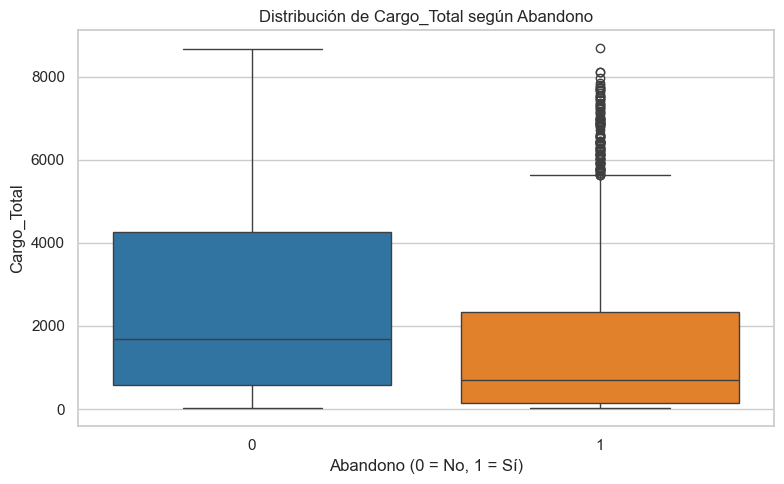

C:\Users\magno\AppData\Local\Temp\ipykernel_25548\538285543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y=var, data=datos_analisis, palette="tab10")


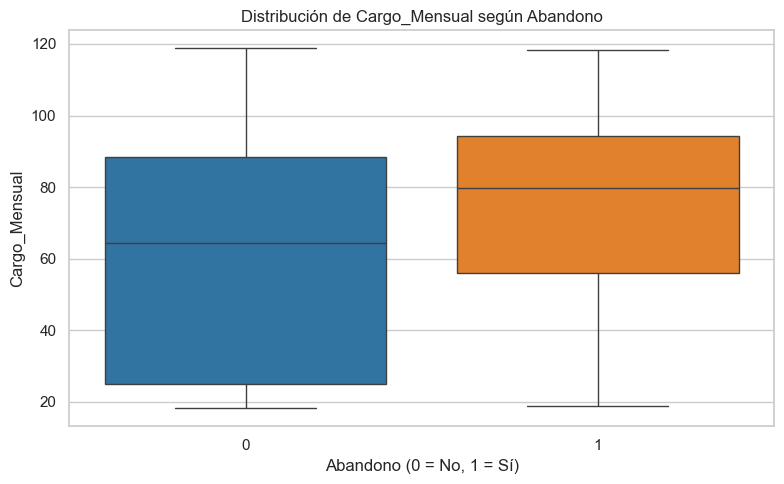

C:\Users\magno\AppData\Local\Temp\ipykernel_25548\538285543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y=var, data=datos_analisis, palette="tab10")


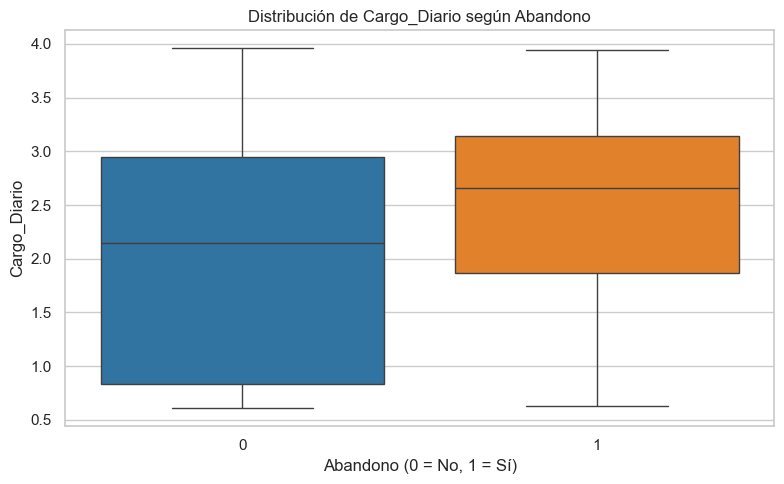

C:\Users\magno\AppData\Local\Temp\ipykernel_25548\538285543.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y=var, data=datos_analisis, palette="tab10")


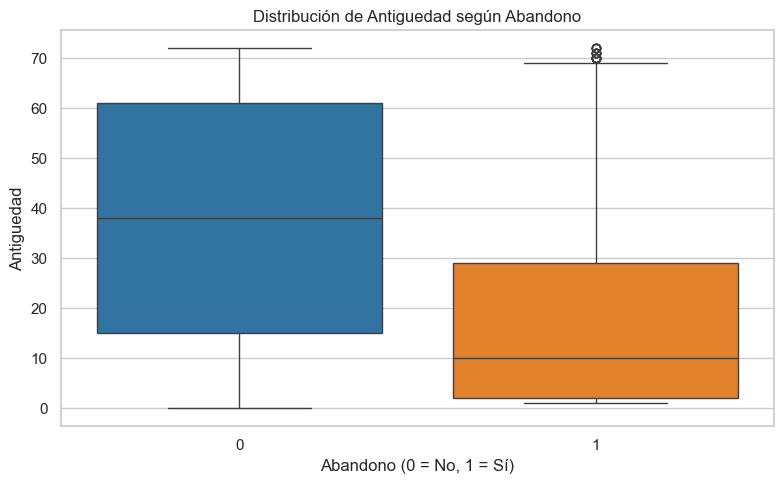

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarte de que la columna "Abandono" sea categórica para mejor visualización
datos_analisis['Abandono'] = datos_analisis['Abandono'].astype('category')

# Lista de variables numéricas a analizar
variables_numericas = ['Cargo_Total', 'Cargo_Mensual', 'Cargo_Diario', 'Antiguedad']

# Estilo general del gráfico
sns.set(style="whitegrid")

# Crear boxplots para cada variable numérica por Abandono
for var in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Abandono', y=var, data=datos_analisis, palette="tab10")
    plt.title(f'Distribución de {var} según Abandono')
    plt.xlabel('Abandono (0 = No, 1 = Sí)')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()


In [50]:
# Estadísticas descriptivas por grupo de Abandono
resumen_estadistico = datos_analisis.groupby('Abandono')[variables_numericas].describe()
print(resumen_estadistico)


         Cargo_Total                                                     \
               count         mean          std    min      25%      50%   
Abandono                                                                  
0             5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
1             1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                            Cargo_Mensual             ... Cargo_Diario  \
               75%      max         count       mean  ...          75%   
Abandono                                              ...                
0         4264.125  8672.45        5174.0  61.265124  ...     2.946667   
1         2331.300  8684.80        1869.0  74.441332  ...     3.140000   

                   Antiguedad                                               \
               max      count       mean        std  min   25%   50%   75%   
Abandono                                                                     
0         3.958333 

C:\Users\magno\AppData\Local\Temp\ipykernel_25548\3106948593.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen_estadistico = datos_analisis.groupby('Abandono')[variables_numericas].describe()


In [51]:
# Generando funciones para ejecutar visualizaciones:


import matplotlib.pyplot as plt
import seaborn as sns

def graficar_boxplots_con_estadisticas(df, variables_numericas, columna_clase='Abandono'):
    """
    Genera boxplots de múltiples variables numéricas por una variable de clase,
    mostrando mínimo, media y máximo para cada categoría.

    Parámetros:
    - df: DataFrame que contiene los datos
    - variables_numericas: Lista de nombres de columnas numéricas a graficar
    - columna_clase: Columna categórica usada para agrupar (por defecto: 'Abandono')
    """
    sns.set(style="whitegrid")
    df[columna_clase] = df[columna_clase].astype('category')

    n_vars = len(variables_numericas)
    fig, axs = plt.subplots(1, n_vars, figsize=(6 * n_vars, 5))

    if n_vars == 1:
        axs = [axs]  # Asegura que axs sea iterable aunque haya solo 1 gráfico

    for i, var in enumerate(variables_numericas):
        ax = axs[i]
        sns.boxplot(x=columna_clase, y=var, data=df, palette="tab10", ax=ax)
        
        ax.set_title(f'{var} según {columna_clase}', fontsize=12)
        ax.set_xlabel(columna_clase)
        ax.set_ylabel(var)

        # Cálculo de estadísticas
        stats = df.groupby(columna_clase)[var].agg(['min', 'mean', 'max'])
        for j, (cat, row) in enumerate(stats.iterrows()):
            ax.text(j, row['min'], f'Min: {row["min"]:.1f}', ha='center', va='bottom', fontsize=9, color='blue')
            ax.text(j, row['mean'], f'Media: {row["mean"]:.1f}', ha='center', va='bottom', fontsize=9, color='green', fontweight='bold')
            ax.text(j, row['max'], f'Max: {row["max"]:.1f}', ha='center', va='top', fontsize=9, color='red')

    plt.tight_layout()
    plt.show()


In [52]:
# Generando fucnion de visualización de variables categóricas:

import matplotlib.pyplot as plt
import seaborn as sns

def graficar_categoricas_en_lienzo(df, columnas_categoricas, columna_clase='Abandono', columnas_por_fila=3):
    """
    Genera countplots para variables categóricas en un solo lienzo, diferenciando por una variable de clase (hue).

    Parámetros:
    - df: DataFrame con los datos.
    - columnas_categoricas: Lista de columnas categóricas a graficar.
    - columna_clase: Columna a usar como hue (por defecto: 'Abandono').
    - columnas_por_fila: Cantidad de gráficos por fila en el lienzo.
    """
    def graficar_por_variable(df, columna, ax):
        sns.countplot(
            data=df,
            x=columna,
            hue=columna_clase,
            palette='tab10',
            ax=ax
        )
        for container in ax.containers:
            ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, fontweight='bold')
        ax.set_title(f'Abandono según {columna}', fontsize=10)
        ax.set_xlabel(columna, fontsize=9)
        ax.set_ylabel('Cantidad')
        ax.legend(title=columna_clase, labels=['No', 'Sí'])
        ax.tick_params(axis='x', rotation=45)

    # Cálculo del lienzo
    total = len(columnas_categoricas)
    n_cols = columnas_por_fila
    n_rows = (total + n_cols - 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
    axs = axs.flatten()

    for i, col in enumerate(columnas_categoricas):
        graficar_por_variable(df, col, axs[i])

    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()


# **Informe final**📄

🔹 **Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).**

Este proyecto se enfoca en el analisis de evación de cliente **churn**. Este analisis es fundamental y muy comun en las empresas de servicios ya que el abandono del cliente afecta directamente la rentabilidad del negocio.

Por esta razon, el siguiente proyecto se enfoca en analizar los siguientes aspectos:

* Conoser cuales son los principales factores (numéricos y categóricos) que influyen directa o indirectamente en la decición del cliente con respecto a su permanencia en la adquisición el servicio.

* Comparar a aquellos clientes que abandona y los que permanecen con relación a sus patrones de comportamiento.

* Extraer información valiosa para poder aplicar medidas prácticas para mejorar la situación actual del negocio.

🔹 **Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.**

>Para poder analizar los datos fueron necesarios comenzar con una serie de pasos para preparar la información:

### 1. Creación del dataset

*   Se Realizó la conección con el origen de datos desde la API y se almacenó en una variable prebia (DataFrame) llama datos

*   Se realiz+o la normalización de las columnas conformadas por columnas dentro de ellas.

*   Posterirmente se procedió a eliminar caracteres no numéricos en cada una de las filas de cada columna para comvertirlas posteriormente a valores numéricos (int64, float64) solo a aquellas columnas de tipo numerico que estaban originalmente como texto. Esto para un mejor analisis de los datos.

*   Se identificaros las columnas binarias, las cuales se estandarizaron considerando solo valores de 1 y 0.




🔹 **Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.**

*   **Se dividen las columnas en variables categoricas y numericas para su analisis de manera independiente**

## 1.      Variables categóricas

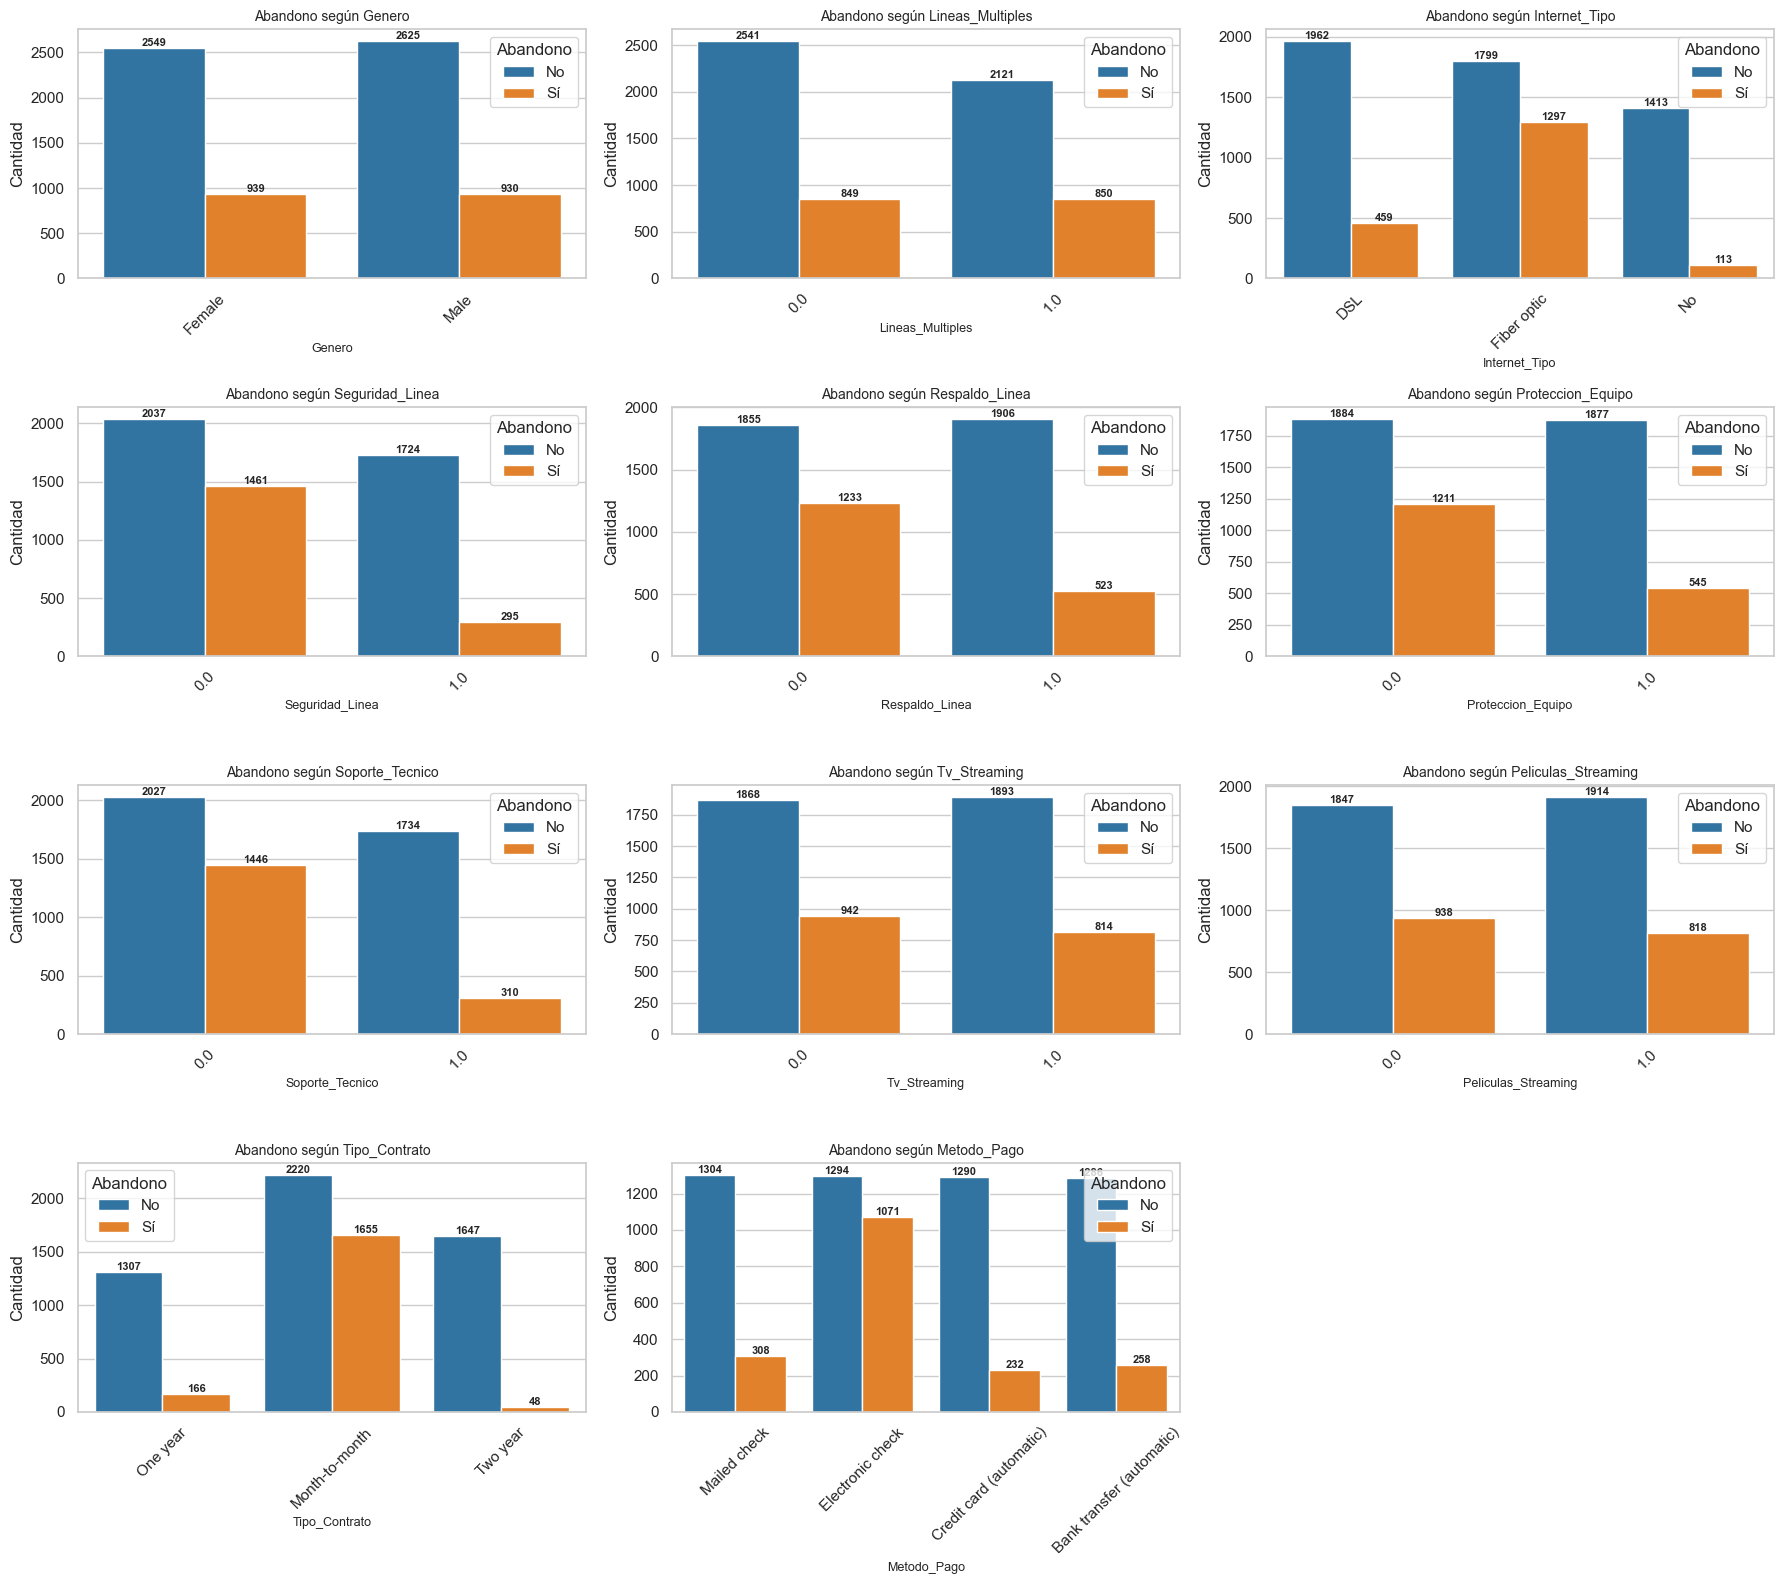

In [53]:
# Generando visualización de variables categóricas:
graficar_categoricas_en_lienzo(datos_analisis, columnas_categoricas)

In [54]:
# Visualizando el porcentaje de abandono opr cada categoría
for var in columnas_categoricas:
    tabla = pd.crosstab(datos_analisis[var], datos_analisis['Abandono'], normalize='index') * 100
    tabla.columns = ['% No Abandono', '% Abandono']
    print(f"\nDistribución de Abandono por: {var}")
    print(tabla.round(2))


Distribución de Abandono por: Genero
        % No Abandono  % Abandono
Genero                           
Female          73.08       26.92
Male            73.84       26.16

Distribución de Abandono por: Lineas_Multiples
                  % No Abandono  % Abandono
Lineas_Multiples                           
0.0                       74.96       25.04
1.0                       71.39       28.61

Distribución de Abandono por: Internet_Tipo
               % No Abandono  % Abandono
Internet_Tipo                           
DSL                    81.04       18.96
Fiber optic            58.11       41.89
No                     92.60        7.40

Distribución de Abandono por: Seguridad_Linea
                 % No Abandono  % Abandono
Seguridad_Linea                           
0.0                      58.23       41.77
1.0                      85.39       14.61

Distribución de Abandono por: Respaldo_Linea
                % No Abandono  % Abandono
Respaldo_Linea                           
0.0

## 2.      Variables numéricas

C:\Users\magno\AppData\Local\Temp\ipykernel_25548\3225774706.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_clase, y=var, data=df, palette="tab10", ax=ax)
C:\Users\magno\AppData\Local\Temp\ipykernel_25548\3225774706.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(columna_clase)[var].agg(['min', 'mean', 'max'])
C:\Users\magno\AppData\Local\Temp\ipykernel_25548\3225774706.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna_clase, y=var, data=df, palette

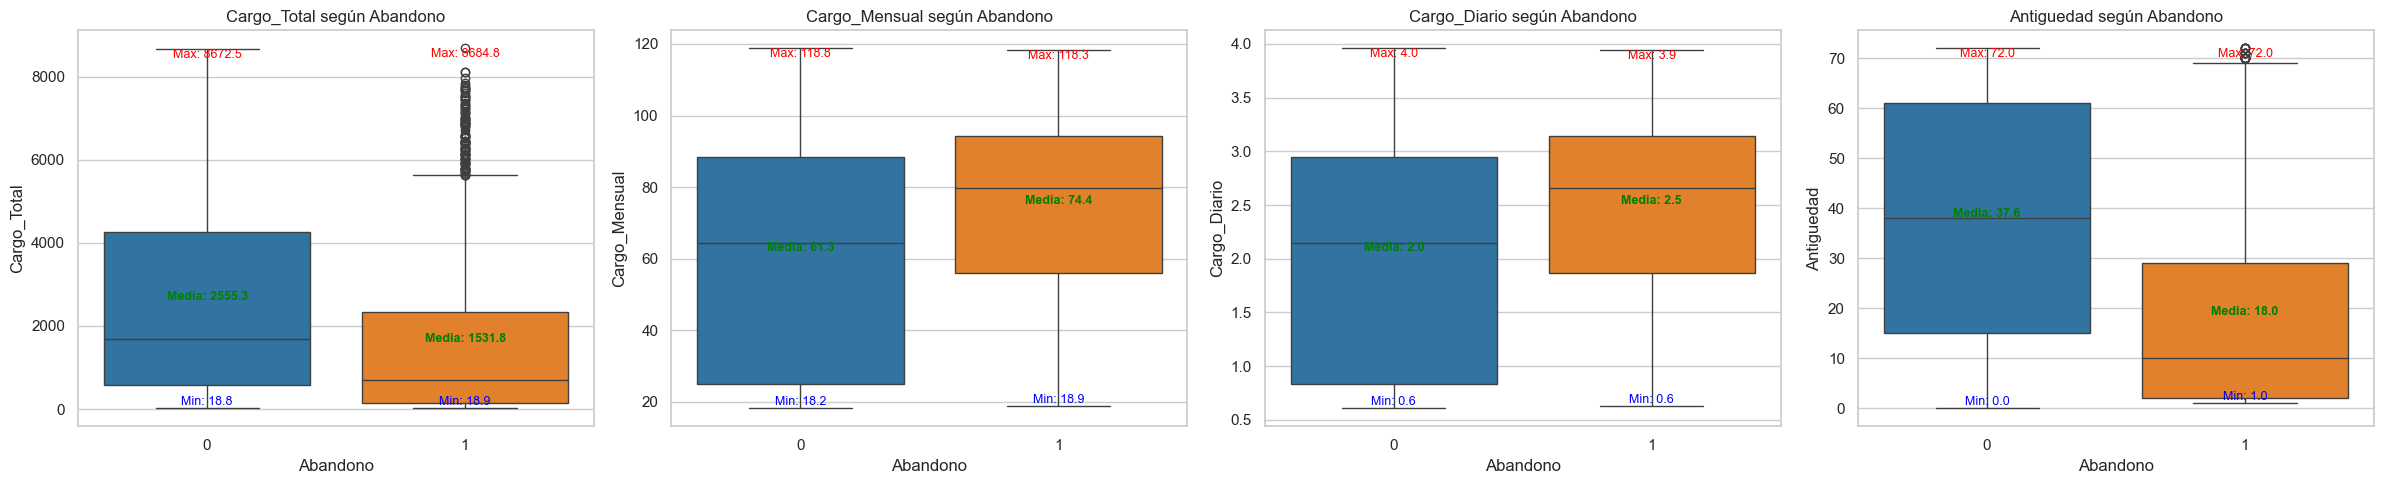

In [55]:
# Ejecutando visualización de variable snuméricas
variables_numericas = ['Cargo_Total', 'Cargo_Mensual', 'Cargo_Diario', 'Antiguedad']
graficar_boxplots_con_estadisticas(datos_analisis, variables_numericas)

In [56]:
# Estadísticas descriptivas por grupo de Abandono
resumen_estadistico = datos_analisis.groupby('Abandono')[variables_numericas].describe()
print(resumen_estadistico)


         Cargo_Total                                                     \
               count         mean          std    min      25%      50%   
Abandono                                                                  
0             5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
1             1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                            Cargo_Mensual             ... Cargo_Diario  \
               75%      max         count       mean  ...          75%   
Abandono                                              ...                
0         4264.125  8672.45        5174.0  61.265124  ...     2.946667   
1         2331.300  8684.80        1869.0  74.441332  ...     3.140000   

                   Antiguedad                                               \
               max      count       mean        std  min   25%   50%   75%   
Abandono                                                                     
0         3.958333 

C:\Users\magno\AppData\Local\Temp\ipykernel_25548\3106948593.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen_estadistico = datos_analisis.groupby('Abandono')[variables_numericas].describe()


🔹 **Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.**

A partir de los resultados obtenidos, se pueden obtener las siguientes conclusiones por cada categoría:

1. **Genero**

*   La taza de abandono entre hombres y mujeres es de 26% en promedio, por lo tanto no hay diferencia signifiva.
*   El genero, en este caso, no es un factor determiante

2. **Lineas_Multiples**

*   Los clientes que poseen más de un alínea de telefónica, tienen una mayor taza de abandono (28.6%), en comparación a los clientes que poseen solo una línea (25.0%).
*   Se debe analizar todas las implicacias que involucra que un cliente tenga más de una línea, como el incremento de costos.

3. **Internet_Tipo**

*   Los clientes con Fiber optic, representan una alta tasa de abandono (42%), -este porcentajke supera por mucho a aquellos clientes quwe no tienen internet o DSL (7%)
*   En base a este resultado es conveniente analizar el costo y calidad del servicio de Fiber optic.


🔹 **Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.**

Segun los analisis expuestos, se presentan las siguientes sugerencias para contrarrestar la alta tasa de abandono:

1.  A los clientes que tienen más de un servicio telefónico y para aquellos que poseen el servicio de fibra optica, es recomendable ofrecerles una porcentaje de descuento significativo para garantizar su fidelidad.

2. Tambien es preferible promover campañas de fidelización ofreciendo paquetes de servicios adicioanles como seguridad, respaldo y soporte. Ya que los clientes que adquirieron estos servicios, presentan una menor taza de abandono.